<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size=6>Model Deployment: Week 1 - Introduction to Model Deployment</center>

# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

# Installing and Importing Necessary Libraries

In [4]:
# Installing the libraries with the specified version.
!pip install pandas==2.2.2 numpy==2.0.2 scikit-learn==1.6.1 xgboost==2.1.4 joblib==1.4.2 streamlit==1.43.2 huggingface_hub==0.29.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.53.2 requires huggingface-hub<1.0,>=0.30.0, but you have huggingface-hub 0.29.3 which is incompatible.


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

import sklearn
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns

# for data preprocessing and pipeline creation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.pipeline import Pipeline # Import Pipeline

# for model training, tuning, and evaluation (regression metrics)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# for model serialization
import joblib

# for creating a folder
import os

# for Hugging Face Space authentication to upload files
from huggingface_hub import login, HfApi

In [2]:
# Set scikit-learn's display mode to 'diagram' for better visualization of pipelines and estimators
sklearn.set_config(display='diagram')

# Loading the Dataset

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset from a CSV file into a Pandas DataFrame
superkart_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Superkart/SuperKart.csv',low_memory=False)

In [5]:
# Create a copy of the dataframe
dataset = superkart_data.copy()

# Data Overview

In [6]:
# Display the first five rows of the dataset
dataset.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [7]:
print(f"There are {dataset.shape[0]} rows  and {dataset.shape[1]} columns.")

There are 8763 rows  and 12 columns.


In [8]:
dataset.columns

Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


- There are 5 numerical and 7 categorical type variables
- There is no missing values

In [10]:
dataset.duplicated().sum()

np.int64(0)

- There are no duplicated values in the data

In [11]:
dataset.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


- There is no missing values in both numerical and categorical columns.

# **Exploratory Data Analysis (EDA)**

We are not using Product_Id as its only unique identifier and doesn't add value to the analysis and modeling.

In [12]:
target =  'Product_Store_Sales_Total'

categorical_features = ['Product_Sugar_Content',  'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']

numeric_features= ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year']

## Univariate Analysis

In [13]:
dataset[numeric_features].describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751
std,2.217320,0.048204,30.694110,8.388381
min,4.000000,0.004000,31.000000,1987.000000
25%,11.150000,0.031000,126.160000,1998.000000
50%,12.660000,0.056000,146.740000,2009.000000
75%,14.180000,0.096000,167.585000,2009.000000
max,22.000000,0.298000,266.000000,2009.000000


- Most of products weight is around 13 and most of their maximum price is around 147
- The minimum product of weight is around 4 and avg of their price is around 31

In [14]:
dataset[categorical_features].describe()

,Product_Sugar_Content,Product_Type,Store_Id,Store_Size,Store_Location_City_Type,Store_Type
count,8763,8763,8763,8763,8763,8763
unique,4,16,4,3,3,4
top,Low Sugar,Fruits and Vegetables,OUT004,Medium,Tier 2,Supermarket Type2
freq,4885,1249,4676,6025,6262,4676


In [15]:
cat_col = dataset.select_dtypes(include = "object").columns.tolist()
cat_col

['Product_Id',
 'Product_Sugar_Content',
 'Product_Type',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type']

In [16]:
for column in cat_col:
  print(dataset[column].value_counts(normalize = True))
  print("Unique values are" , dataset[column].nunique())
  print("-" * 50)

Product_Id
FD306     0.000114
FD6114    0.000114
FD7839    0.000114
FD5075    0.000114
FD8233    0.000114
            ...   
FD1387    0.000114
FD1231    0.000114
FD5276    0.000114
FD8553    0.000114
FD6027    0.000114
Name: proportion, Length: 8763, dtype: float64
Unique values are 8763
--------------------------------------------------
Product_Sugar_Content
Low Sugar    0.557457
Regular      0.256875
No Sugar     0.173342
reg          0.012325
Name: proportion, dtype: float64
Unique values are 4
--------------------------------------------------
Product_Type
Fruits and Vegetables    0.142531
Snack Foods              0.131119
Frozen Foods             0.092548
Dairy                    0.090836
Household                0.084446
Baking Goods             0.081707
Canned                   0.077257
Health and Hygiene       0.071665
Meat                     0.070524
Soft Drinks              0.059226
Breads                   0.022823
Hard Drinks              0.021226
Others                  

- Product_Sugar_Content has 3 distinct categories, wherein 'Low Sugar' are the most common.
- Store_Size has 3 distinct categories, wherein 'Medium' are the most common.
- Store_Location_City_Type has 3 distinct categories, wherein 'Tier 2' are the most common.
- Store_Type has 4 distinct categories, wherein 'Supermarket Type2' are the most common.

In [17]:
# Replace 'reg' with 'Regular value'
dataset['Product_Sugar_Content'] = dataset['Product_Sugar_Content'].replace('reg', 'Regular')

In [18]:
dataset[target].describe()

,Product_Store_Sales_Total
count,8763.000000
mean,3464.003640
std,1065.630494
min,33.000000
25%,2761.715000
50%,3452.340000
75%,4145.165000
max,8000.000000


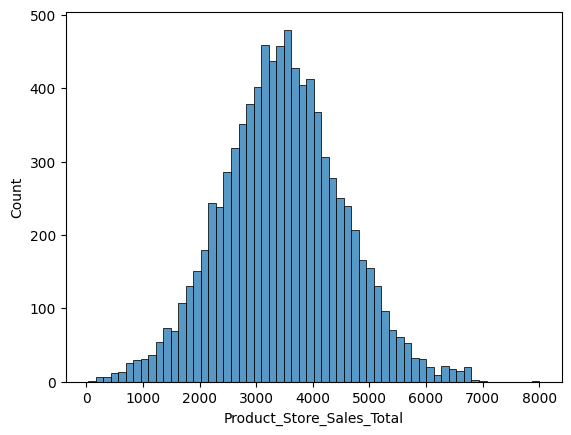

In [19]:
sns.histplot(dataset[target]);

- *Sales_Total* appears to be normally distributed.

## Bivariate Analysis

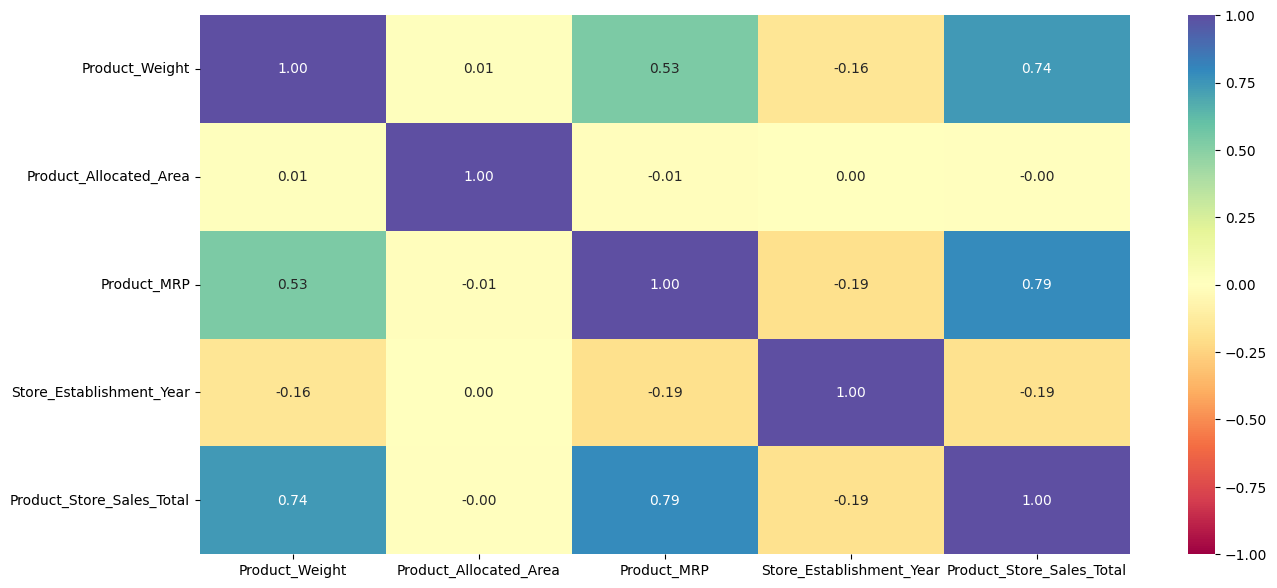

In [20]:
plt.figure(figsize = (15,7))
sns.heatmap(dataset.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral')
plt.show()

- *Sales_Total* is highly positively correlated with *Product_MRP* (0.79) and  *'Product_Weight'* (0.74).
- *Sales_Total* and *Store_Establishment_Year* have slightly negative correlation.
- *Product_MRP* and *Product_Weight* have slightly high positive correlation.

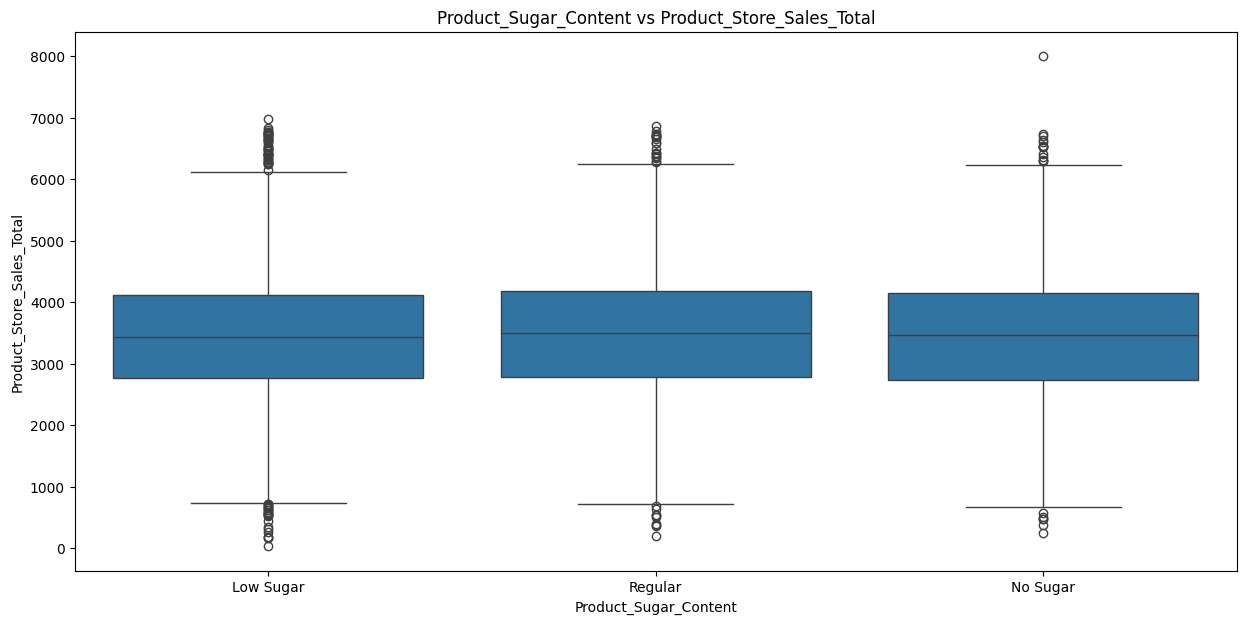

In [21]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', data = dataset )
plt.title('Product_Sugar_Content vs Product_Store_Sales_Total')
plt.show()

- Looks like equally or closed amount of sales for all 'Product_Sugar_Content' varieties

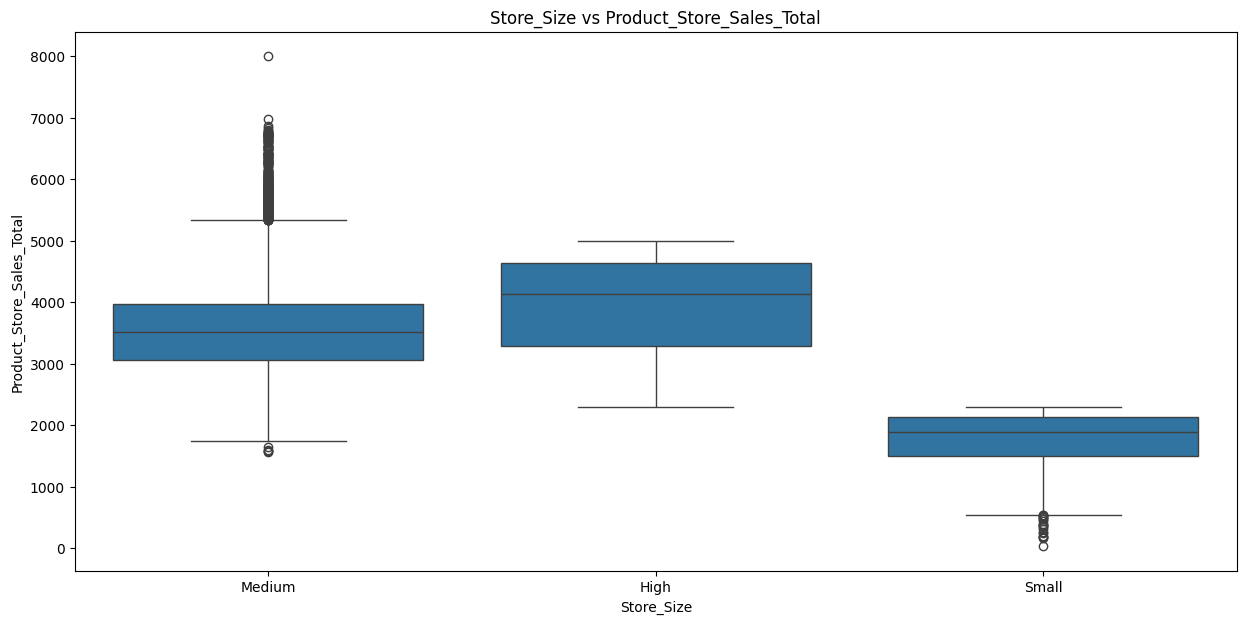

In [22]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Store_Size', y = 'Product_Store_Sales_Total', data = dataset )
plt.title('Store_Size vs Product_Store_Sales_Total')
plt.show()

- 'Store_Size' with a High tend to have higher median sales compared to those medium and small respectively.

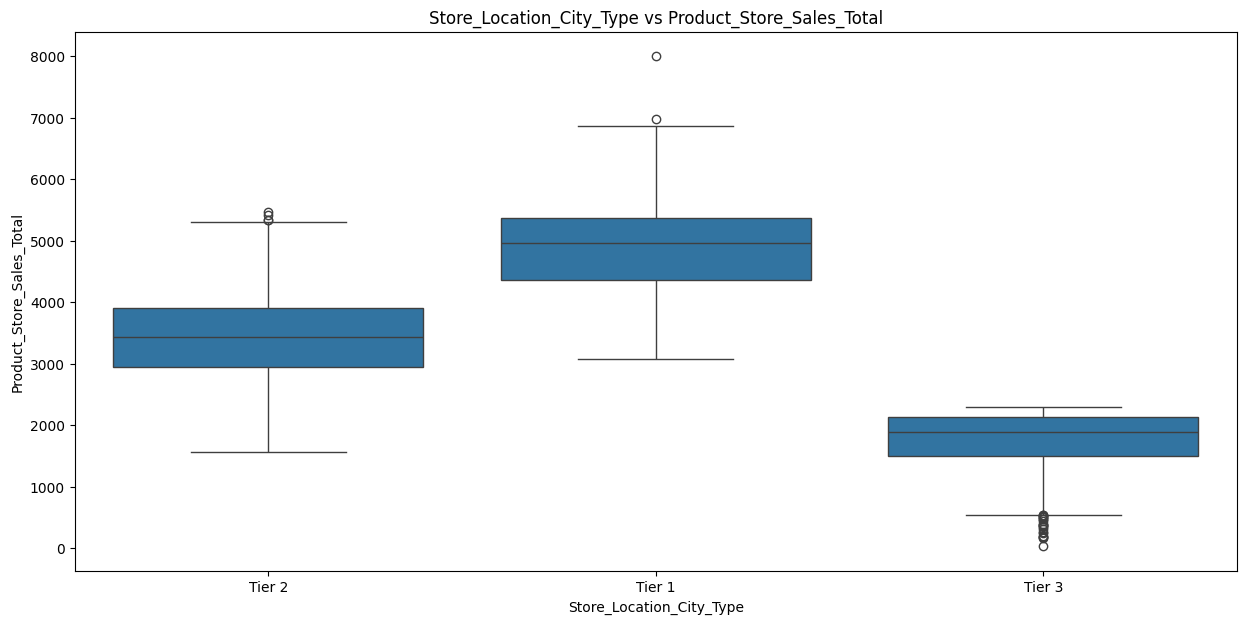

In [23]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Store_Location_City_Type', y = 'Product_Store_Sales_Total', data = dataset )
plt.title('Store_Location_City_Type vs Product_Store_Sales_Total')
plt.show()

- 'Store_Location_City_Type' with a Tier 1 tend to have higher median sales compared to those Tier 2 and Tier 3.

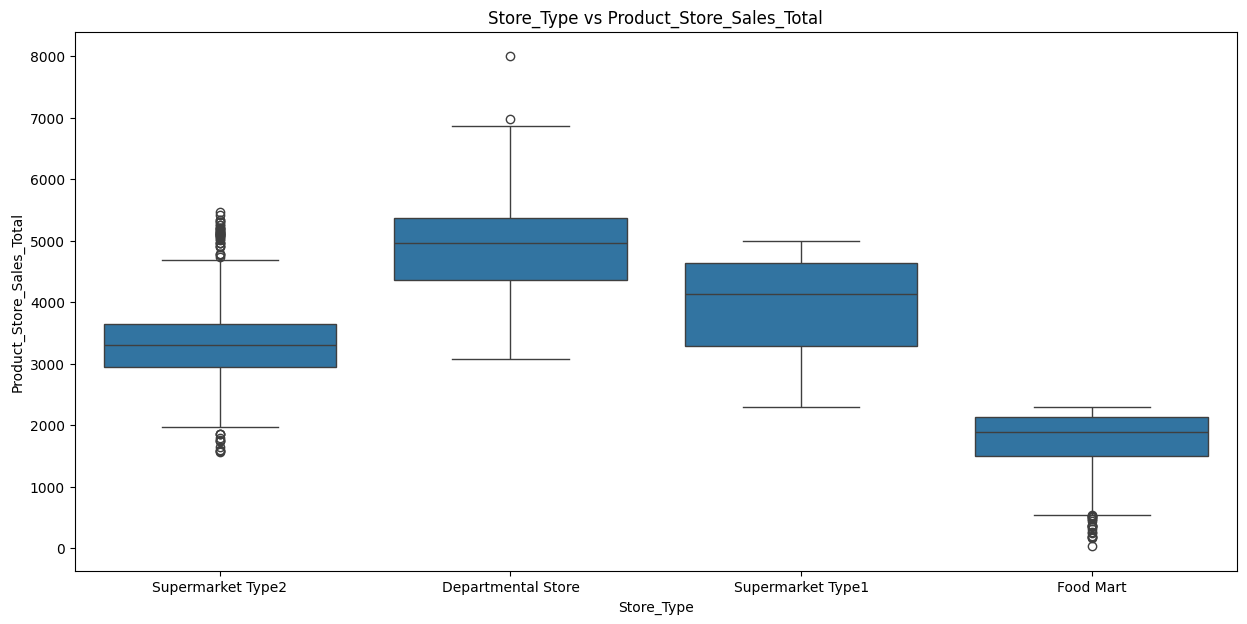

In [24]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Store_Type', y = 'Product_Store_Sales_Total', data = dataset )
plt.title('Store_Type vs Product_Store_Sales_Total')
plt.show()

- 'Store_Type' with a Departmental store tend to have higher median sales then supermarket Type 1 comes 2nd then supermarket Type 2 comes third and the least sales are appeared in food mart.

# Model Building and Hyperparameter Tuning

### Data Preprocessing Pipeline

In [25]:
target =  'Product_Store_Sales_Total'

categorical_features = ['Product_Sugar_Content',  'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']

numeric_features= ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year']

In [26]:
# Define predictor matrix (X) using selected numeric and categorical features
X = dataset[numeric_features + categorical_features]

# Define target variable
y = dataset[target]

In [27]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

In [28]:
# Create a preprocessing pipeline for numerical and categorical features

preprocessor = make_column_transformer(
    (Pipeline([('num_imputer', SimpleImputer(strategy='median')),
               ('scaler', StandardScaler())]), numeric_features),
    (Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
               ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

### Utility Functions

- I'll fit different models on the train data and observe their performance.
- I'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- I'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.

I'll start by creating a function to get model scores, so that I don't have to use the same codes repeatedly.

In [29]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Random Forest Regressor - Model Training Pipeline

In [31]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [32]:
# Create pipeline with preprocessing and Random Forest model
rf_pipeline = make_pipeline(preprocessor, rf_model)

In [33]:
# Train the model pipeline on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [34]:
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline, X_train,y_train)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,107.326895,40.645798,0.989842,0.989828,0.015197


In [35]:
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline, X_test,y_test)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,283.305602,109.298449,0.929658,0.929254,0.038891


- The model is slightly overfitting, as it has a higher R-squared on the train set (~ 0.989) than on the test set (~ 0.93). This indicates that it performs worse on unseen data.

- So let's try to reduce this overfitting by tuning the hyperparameters.

### Random Forest Regressor - Hyperparameter Tuning

In [36]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
rf_pipeline = make_pipeline(preprocessor, rf_tuned)

# Grid of parameters to choose from
parameters = parameters = {
    'randomforestregressor__max_depth':[3, 4, 5, 6],
    'randomforestregressor__max_features': ['sqrt','log2',None],
    'randomforestregressor__n_estimators': [50, 75, 100, 125, 150]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_pipeline, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features=None,
                                       n_estimators=150, random_state=42))])

In [37]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n")
rf_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,293.335688,155.227392,0.924125,0.924016,0.055745


In [38]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n")
rf_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,315.384667,168.35306,0.912826,0.912325,0.059391


**Observation:**

- Before tuning, there was a substantial gap between the train and test R-squared values (~ 0.989 vs. ~ 0.929), indicating overfitting. After tuning, this gap has decreased (~ 0.924 vs. ~ 0.912), suggesting that the model is now generalizing better to unseen data.


### XGBoost Regressor - Model Training Pipeline

In [39]:
# Define base XGBoost model
xgb_model = XGBRegressor(random_state=42)

In [40]:
# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_model)

In [41]:
# Train the model pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [42]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_pipeline, X_train, y_train)
print("Training performance \n")
xgb_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,132.873337,62.735069,0.984431,0.984409,0.022233


In [43]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_pipeline, X_test,y_test)
print("Testing performance \n")
xgb_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,310.109498,137.521286,0.915718,0.915234,0.050988


- The model is slightly overfitting, as it has a higher R-squared on the train set (~ 0.984) than on the test set (~ 0.915). This indicates that it performs worse on unseen data.

- So let's try to reduce this overfitting by tuning the hyperparameters.

### XGBoost Regressor - Hyperparameter Tuning

In [44]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_tuned)

#Grid of parameters to choose from
param_grid = {
    'xgbregressor__n_estimators': [50, 100, 150, 200],    # number of trees to build
    'xgbregressor___max_depth': [2, 3, 4],    # maximum depth of each tree
    'xgbregressor___colsample_bytree': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each tree
    'xgbregressor___colsample_bylevel': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each level of a tree
    'xgbregressor___learning_rate': [0.01, 0.05, 0.1],    # learning rate
    'xgbregressor___reg_lambda': [0.4, 0.5, 0.6],    # L2 regularization factor
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_pipeline, param_grid, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "_colsample_bylevel", "_colsample_bytree", "_learning_rate", "_max_depth", "_reg_lambda" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "_colsample_bylevel", "_colsample_bytree", "_learning_rate", "_max_depth", "_reg_lambda" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, ...))])

In [45]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n")
xgb_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,185.315326,80.853314,0.969717,0.969674,0.029531


In [46]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n")
xgb_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,304.748698,131.948767,0.918606,0.918139,0.048642


**Observation:**

- Before tuning, there was a substantial gap between the train and test R-squared values (~ 0.984 vs. ~ 0.915), indicating overfitting. After tuning, this gap has decreased (~ 0.969 vs. ~ 0.918), suggesting that the model is now generalizing better to unseen data.

## Model Performance Comparison and Final Model Selection

In [47]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,107.326895,293.335688,132.873337,185.315326
MAE,40.645798,155.227392,62.735069,80.853314
R-squared,0.989842,0.924125,0.984431,0.969717
Adj. R-squared,0.989828,0.924016,0.984409,0.969674
MAPE,0.015197,0.055745,0.022233,0.029531


In [48]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,283.305602,315.384667,310.109498,304.748698
MAE,109.298449,168.353060,137.521286,131.948767
R-squared,0.929658,0.912826,0.915718,0.918606
Adj. R-squared,0.929254,0.912325,0.915234,0.918139
MAPE,0.038891,0.059391,0.050988,0.048642


In [49]:
(models_train_comp_df - models_test_comp_df).iloc[2]

,R-squared
Random Forest Estimator,0.060185
Random Forest Tuned,0.011299
XGBoost,0.068714
XGBoost Tuned,0.051111


**Observations:**

- The Random Forest Estimator model has the highest R² score on the test set.

- The tuned XGBoost model has the highest R² score on the test set.

- We should also consider the difference between the train and test R² scores. In this regard, the tuned Random Forest model shows the smallest difference, followed by the  Random Forest Estimator model.

- However, when comparing the train scores of the Random Forest Estimator and tuned Random Forest models, the R² score of the Random Forest Estimator is higher.

- Based on all these observations, the Random Forest Estimator model can be considered the best overall.



# Deployment Approach

The crux of our solution is to decouple the frontend and backend of the application for better accessibility and seamless integration with other services. This modular enhances maintainability and scalability.

**Backend Development (Flask):**

1. I will develop a Flask application (app.py) responsible for:
  - Loading the serialized RandomForest model we trained and saved as rental_price_prediction_model_v1_0.joblib.
  - Exposing two API endpoints:
    - `/v1/sales`: For predicting the rental price of a single property, accepting input features as JSON, mirroring the data format used during training and EDA.
    - `/v1/salesbatch`: For batch predictions on multiple properties, processing data uploaded as a CSV file, consistent with the dataset structure.
2. This backend handles the core prediction logic, applying the same data preprocessing steps (imputation, scaling, and encoding) used during model training to ensure consistency and accuracy. It returns predictions as JSON responses, facilitating easy integration with the frontend.
3. I'll deploy this Flask app, the serialized model, and the requirements.txt file to a Hugging Face Space using a Dockerfile. This makes the prediction service publicly accessible via a unique URL.


**Frontend Development (Streamlit):**

1. A separate Streamlit application (app.py) will serve as the user interface, tailored for stakeholders.

2. This frontend will include:
  - Form-based inputs for online predictions, allowing users to enter property details like 'Product_Weight', 'Product_Sugar_Content', etc., aligning with the features used in the model.
  - A CSV file uploader for batch predictions, enabling users to analyze multiple properties simultaneously, similar to the dataset format used for training.
3. The Streamlit app will use the `requests` library to communicate with the Flask API, sending input data and displaying predictions in a user-friendly format. This interaction facilitates a seamless user experience.
4. Similar to the backend, I'll deploy the Streamlit app to a Hugging Face Space using a `Dockerfile` with its own `requirements.txt` for managing dependencies.

Once deployed, stakeholders can access the application through the frontend URL. They can input sales details or upload a CSV file to obtain instant sales predictions, enabling data-driven sales strategies. This decoupled approach ensures flexibility and ease of access for users.

# Load the Serialized Model

**Note:** To ensure continuity and leverage our previous work, I'll utilize the serialized Randomforest model trained and saved it.

In [50]:
import os

# Create a folder to upload your trained serialized model into it
os.makedirs("backend_files", exist_ok=True)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

# Use the correct full path to your model
model_path = "/content/drive/My Drive/Colab Notebooks/superkart_sales_prediction_model_v1_0.joblib"

import joblib
saved_model = joblib.load(model_path)

print("Model loaded successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully.


In [52]:
!cp "/content/drive/My Drive/Colab Notebooks/superkart_sales_prediction_model_v1_0.joblib" .


In [53]:
# Define the file path to load the uploaded serialized model
model_path = "backend_files/superkart_sales_prediction_model_v1_0.joblib"

In [56]:
import joblib

# Load the saved model pipeline from the file
saved_model = joblib.load(model_path)

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [57]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [58]:
saved_model.predict(X_test)

array([3190.7637, 3366.0392, 2412.7122, ..., 4147.794 , 2829.1849,
       4441.7216])

- As we can see, the model can be directly used for making predictions without any retraining.

# App Backend

## Setting up a Hugging Face Docker Space for the Backend

- I will creating a Hugging Face Docker Space for our backend using the Hugging Face Hub API.
- This automates the space creation process and enables seamless deployment of my Flask app.

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
login(token="HF_TOKEN")

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [60]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("SalesPredictionBackendv3",  # One can replace "Backend_Docker_space" with the desired space name
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create a Docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-687f58ae-0fc0559f059b4d934ed16e80;a4d796c2-c4c7-4140-a71f-9cb95e313353)

You already created this space repo


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Flask Web Framework


In [61]:
%%writefile backend_files/app.py
# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize the Flask application
sales_predictor_api = Flask("Superkart Store  sales Predictor")

# Load the trained machine learning model
model = joblib.load("superkart_sales_prediction_model_v1_0.joblib")

# Define a route for the home page (GET request)
@sales_predictor_api.get('/')
def home():
    """
    This function handles GET requests to the root URL ('/') of the API.
    It returns a simple welcome message.
    """
    return "Welcome to the Superkart Store Sales Prediction API!"

# Define an endpoint for single property prediction (POST request)
@sales_predictor_api.post('/v1/sales')
def predict_sales():
    """
    This function handles POST requests to the '/v1/rental' endpoint.
    It expects a JSON payload containing property details and returns
    the predicted rental price as a JSON response.
    """
    # Get the JSON data from the request body
    sales_data = request.get_json()

    # Extract relevant features from the JSON data
    sample = {

     'Product_Sugar_Content': sales_data['Product_Sugar_Content'],
     'Product_Weight': sales_data['Product_Weight'],
     'Product_Allocated_Area': sales_data['Product_Allocated_Area'],
     'Product_MRP': sales_data['Product_MRP'],
     'Store_Establishment_Year': sales_data['Store_Establishment_Year'],
     'Product_Type': sales_data['Product_Type'],
     'Store_Id': sales_data['Store_Id'],
     'Store_Size': sales_data['Store_Size'],
     'Store_Location_City_Type': sales_data['Store_Location_City_Type'],
     'Store_Type': sales_data['Store_Type']
    }

    # Convert the extracted data into a Pandas DataFrame
    input_data = pd.DataFrame([sample])

    # Make prediction (get log_price)
    prediction = model.predict(input_data)[0]

    # Calculate actual price
   # predicted_price = np.exp(predicted_log_price)

    # Convert predicted_price to Python float
    predicted_sale = round(float(prediction), 2)
    # The conversion above is needed as we convert the model prediction (log price) to actual price using np.exp, which returns predictions as NumPy float32 values.
    # When we send this value directly within a JSON response, Flask's jsonify function encounters a datatype error

    # Return the actual price
    return jsonify({'Predicted Sale (in dollars)': predicted_sale})

# Define an endpoint for batch prediction (POST request)
@sales_predictor_api.post('/v1/salesbatch')
def predict_sales_batch():
    """
    This function handles POST requests to the '/v1/rentalbatch' endpoint.
    It expects a CSV file containing property details for multiple properties
    and returns the predicted rental prices as a dictionary in the JSON response.
    """
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the CSV file into a Pandas DataFrame
    input_data = pd.read_csv(file.stream)

    # Make predictions for all properties in the DataFrame (get log_prices)
    predictions = model.predict(input_data).tolist()
    predicted_sales = [round(float(sale), 2) for sale in predictions]

    # Calculate actual prices
    #predicted_prices = [round(float(np.exp(log_price)), 2) for log_price in predicted_log_prices]
    #predicted_sales = round(float(predicted_sales), 2)

    # Create a dictionary of predictions with property IDs as keys
    sale_ids = input_data['Product_Id'].tolist()  # Assuming 'id' is the property ID column
    output_dict = dict(zip(sale_ids, predicted_sales))  # Use actual prices

    # Return the predictions dictionary as a JSON response
    return output_dict

# Run the Flask application in debug mode if this script is executed directly
if __name__ == '__main__':
    sales_predictor_api.run(debug=True)


Writing backend_files/app.py


## Dependencies File

In [62]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
uvicorn[standard]
streamlit==1.43.2

Writing backend_files/requirements.txt


## Dockerfile

In [63]:
%%writefile backend_files/Dockerfile

FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:sales_predictor_api"]

Writing backend_files/Dockerfile


## Uploading Files to Hugging Face Space for the Backend

In [ ]:
access_key = "HF_TOKEN"  # Your Hugging Face token created from access keys in write mode

# for hugging face space authentication to upload files
from huggingface_hub import HfApi

repo_id = "hana-meko-9191/SalesPredictionBackendv3"  # Your Hugging Face space id
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/hana-meko-9191/SalesPredictionBackendv3/commit/ae4455ec048feef7a842181b726145d776f0f6f3', commit_message='Upload folder using huggingface_hub', commit_description='', oid='ae4455ec048feef7a842181b726145d776f0f6f3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/hana-meko-9191/SalesPredictionBackendv3', endpoint='https://huggingface.co', repo_type='space', repo_id='hana-meko-9191/SalesPredictionBackendv3'), pr_revision=None, pr_num=None)

# App Frontend

## Setting up a Hugging Face Docker Streamlit Space for the Frontend

## Streamlit for Interactive UI

In [65]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files" , exist_ok=True)

In [66]:
%%writefile frontend_files/app.py

import streamlit as st
import pandas as pd
import requests

# Set the title of the Streamlit app
st.title("Superkart Sales Prediction App")

# Section for online prediction
st.subheader("Online Prediction")

st.write("This tool predicts the sales of a product based on its features.")

st.subheader("Enter the product details:")

# Collect user input for property features
Product_Sugar_Content = st.selectbox('Product_Sugar_Content(What is the Product_Sugar_Content?)', ['Low Sugar', 'Regular', 'No Sugar', 'reg'])
Product_Weight = st.number_input('Product_Weight(What is Product_Weight?)', min_value = 0.2, max_value = 300.0, value = 5.0)
Product_Allocated_Area = st.number_input('Product_Allocated_Area(What is Product_Allocated_Area?)', min_value = 0.0, max_value = 0.3, value = 0.05)
Product_MRP = st.number_input('Product_MRP(What is Product_MRP?)', min_value = 0.2, max_value = 300.0, value = 5.0)
Store_Establishment_Year = st.number_input('Store_Establishment_Year(What is Store_Establishment_Year?)', min_value = 1900, max_value = 2025, value = 1995)
Product_Type = st.selectbox('Product_Type(What is Product_Type?)', ['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood', 'Snack Foods', 'Fruits and Vegetables', 'Household'])
Store_Id = st.selectbox('Store_Id(What is Store_Id?)', ['OUT004', 'OUT003', 'OUT001', 'OUT002', 'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027'])
Store_Size = st.selectbox('Store_Size(What is Store_Size?)', ['Medium', 'High', 'Small', 'medium'])
Store_Location_City_Type = st.selectbox('Store_Location_City_Type(What is Store_Location_City_Type?)', ['Tier 2', 'Tier 1', 'Tier 3'])
Store_Type = st.selectbox('Store_Type(What is Store_Type?)', ['Supermarket Type2', 'Departmental Store', 'Supermarket Type1', 'Food Mart', 'Supermarket Type3'])


# Convert user input into a DataFrame
input_data = {
     'Product_Sugar_Content': Product_Sugar_Content,
     'Product_Weight': Product_Weight,
     'Product_Allocated_Area':Product_Allocated_Area,
     'Product_MRP': Product_MRP,
     'Store_Establishment_Year': Store_Establishment_Year,
     'Product_Type': Product_Type,
     'Store_Id': Store_Id,
     'Store_Size': Store_Size,
     'Store_Location_City_Type': Store_Location_City_Type,
     'Store_Type': Store_Type

}


if st.button("Predict", type='primary'):
    response = requests.post("https://hana-meko-9191-SalesPredictionBackendv3.hf.space/v1/sales", json=input_data)    # enter user name and space name before running the cell
    if response.status_code == 200:
        result = response.json()
        sales_prediction = result["Predicted Sale (in dollars)"]  # Extract only the value
        st.write(f"Based on the information provided, the sales is likely to {sales_prediction}.")
    else:
        st.error("Error in API request")

# Batch Prediction
st.subheader("Batch Prediction")

file = st.file_uploader("Upload CSV file", type=["csv"])
if file is not None:
    if st.button("Predict for Batch", type='primary'):
        response = requests.post("https://hana-meko-9191-SalesPredictionBackendv3.hf.space/v1/salesbatch", files={"file": file})    # enter user name and space name before running the cell
        if response.status_code == 200:
            result = response.json()
            st.header("Batch Prediction Results")
            st.write(result)
        else:
            st.error("Error in API request")



Writing frontend_files/app.py


## Dependencies File

In [67]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

Writing frontend_files/requirements.txt


## Dockerfile

In [68]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space for the Frontend

In [ ]:

#login(token="HF_TOKEN")
# for hugging face space authentication to upload files
from huggingface_hub import HfApi

repo_id = "hana-meko-9191/SalesPredictionFrontendv3"  # Your Hugging Face space id hana-meko-9191/SalesPredictionBackend_v1

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files" ,  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/hana-meko-9191/SalesPredictionFrontendv3/commit/36035202dcad07565a828683e88f3f7d6e2dae17', commit_message='Upload folder using huggingface_hub', commit_description='', oid='36035202dcad07565a828683e88f3f7d6e2dae17', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/hana-meko-9191/SalesPredictionFrontendv3', endpoint='https://huggingface.co', repo_type='space', repo_id='hana-meko-9191/SalesPredictionFrontendv3'), pr_revision=None, pr_num=None)

# Inferencing using Flask API


As the ***frontend and backend are decoupled***, I can ***access the backend directly for predictions***.
- The decoupling ensures seamless interaction with the deployed model while leveraging the API for scalable inference.

In [70]:
import json  # To handle JSON formatting for API requests and responses
import requests  # To send HTTP requests to the deployed Flask API

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

In [71]:
#hana-meko-9191/SalesPredictionBackend_v1

In [72]:
model_root_url = "https://hana-meko-9191-salespredictionbackendv3.hf.space"   # Base URL of the deployed Flask API on Hugging Face Space; enter user name and space name before running the cell

In [73]:
model_url = model_root_url + "/v1/sales"  # Endpoint for online (single) inference

In [74]:
model_batch_url = model_root_url + "/v1/salesbatch"  # Endpoint for batch inference

## Online Inference

The idea is to send a single request to the API and receive an immediate response. This is useful for real-time applications like recommendation systems and fraud detection.

* This data is sent as a JSON payload in a POST request to the model endpoint.
* The model processes the input features and returns a prediction as a JSON payload.

In [75]:
payload_superkart = {
     'Product_Sugar_Content': 'Low Sugar',
     'Product_Weight': 12.66,
     'Product_Allocated_Area': 0.027,
     'Product_MRP': 117.08,
     'Store_Establishment_Year': 2009,
     'Product_Type': 'Frozen Foods',
     'Store_Id': 'OUT004',
     'Store_Size': 'Medium',
     'Store_Location_City_Type': 'Tier 2',
     'Store_Type': 'Supermarket Type2'
}

In [76]:
# Sending a POST request to the model endpoint with the test payload
response = requests.post(model_url, json=payload_superkart)

In [77]:
response

<Response [200]>

- The `<Response [200]>` you see is an HTTP status code.
- It indicates that your request was successful, and the server was able to process it without any problems.

In [78]:
print(response.json())

{'Predicted Sale (in dollars)': 2850.38}


# Conclusion



**1. Easy to Update and Grow:**
Keeping the frontend and backend separate makes it easier to make changes. For example, we can update how the app looks (frontend) without touching the prediction model (backend), or improve the backend without breaking the user interface. We can also handle more users by adding more power to the backend, without slowing down the frontend. It's like having a system with parts that can be changed or improved independently.

**2. Use Any Tools We Want:**
Since the frontend and backend are separate, we can choose different tools for each. For example, we can use Streamlit for the user interface and Flask for the backend. We’re not locked into one technology, so we can always pick the best tool for each part.

**3. Can Be Used Again:**
The backend works like a service that other apps can also use. This means we can connect the prediction feature to other parts of Airbnb’s system or even share it with outside partners. It's like building a tool that works in many situations, saving time and adding more value.

**4. Better Team Collaboration:**
Frontend and backend developers can work at the same time without waiting for each other. This speeds up the development process and makes teamwork easier.

**5. Faster Bug Fixes and Testing:**
If there's a bug, we can fix just the part where the problem is—either frontend or backend—without having to touch the entire system. This makes testing and fixing issues quicker and safer.

**6. Improved Security:**
By keeping the backend separate, we can hide sensitive data and logic from the user. Only the results are sent to the frontend, which helps keep the system more secure.


<font size=6 color="blue">Power Ahead!</font>
___

In [79]:
!jupyter nbconvert --to html Hana_Mekonnen_Superkart_Proj_fullcode.ipynb

[NbConvertApp] Converting notebook Hana_Mekonnen_Superkart_Proj_fullcode.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^^